In [50]:
import numpy as np
import matplotlib.pyplot as plt
from nbodykit.lab import *

from scipy.special import spherical_jn
from scipy import integrate

In [51]:
redshift = 0.0
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')

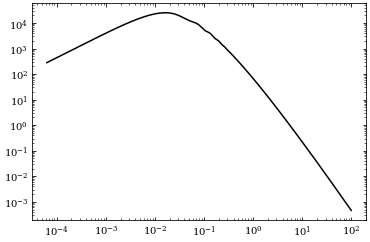

In [52]:
k = numpy.logspace(-4.2, 2, 10000)
plt.loglog(k, Plin(k), c='k', label=r'$b_1^2 P_\mathrm{lin}$')

In [53]:
R_sigma = 8 /cosmo.H0

def sigma_func(kk):
    x = kk*R_sigma
    W = 3 * spherical_jn(1, x) / (x)
    factor = kk**2 /(2.*np.pi**2)
    return factor*W**2

sigma8   = integrate.simps(Plin(k)*sigma_func(k), k )

print(np.sqrt(sigma8) )

5.445472976098899


In [ ]:
Delta = k**3*Plin(k)/(2.*np.pi**2)
log10Delta = np.array([np.log10(k), np.log10(Delta)]).T
np.savetxt('planck2015_log10Delta.dat', log10Delta)

In [23]:
cosmo.get_pklin( )

TypeError: get_pklin() takes exactly 2 positional arguments (0 given)

In [24]:
nbodykit.cosmology.power.transfers.CLASS(cosmo, 0.0)